In [242]:
# import libraries 
import pandas as pd
pd.options.display.float_format = '{:,.0f}'.format ##.map({:,.0f})
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style 
style.use('ggplot') 
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats

import sklearn.preprocessing as prepro
pd.options.display.max_columns=60  

# read the data
train = pd.read_csv('data/P1train.csv', index_col=0)
test = pd.read_csv('data/P1test.csv', index_col=0)
county_facts_dictionary = pd.read_csv('data/county_facts_dictionary.csv')

# Step 1 : Simple linear regressions

In this part, you are required to develop a simple model that can be used for predicting the response.
To reduce the difficulty, you are allowed only limited manipulations of the original data set. You
are allowed to take power transformations of the original variables (square roots, logs, inverses,
squares, etc), but you are NOT allowed to create interaction variables. Your model should include
NO more than 5 <predictors>/covariates, but should explain as much variability as possible.
After obtaining the model with aforementioned features, you are required to diagnose and
analyze the model and provide meaningful interpretations. Please focus your attention on the in-
terpretation of the model. A strong analysis should include the interpretation of various coefficients,statistics, and plots associated with their model and the verificatibe used for predicting the response.'''

In [243]:
##Replacing codes by indicator names
Dic={}
Dic_inv = {}
for i in range(len(county_facts_dictionary)) :
    Dic[county_facts_dictionary.values[i][0]]=county_facts_dictionary.values[i][1]
    Dic_inv[county_facts_dictionary.values[i][1]]=county_facts_dictionary.values[i][0]
train.rename(columns=Dic,inplace=True)
test.rename(columns=Dic,inplace=True)
#Step 1-3 : only the first 52 columns 
train.drop(columns=['Bernie Sanders', 'Donald Trump', 'Hillary Clinton','John Kasich', 'Ted Cruz'],inplace=True)
train.HilaryPercent=train.HilaryPercent*100
test.drop(columns=['Bernie Sanders', 'Donald Trump', 'Hillary Clinton','John Kasich', 'Ted Cruz'],inplace=True)

## 1.1 Colinearity heatmap

/home/zhou/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Text(0.5, 0.98, 'Attributes Correlation Heatmap')

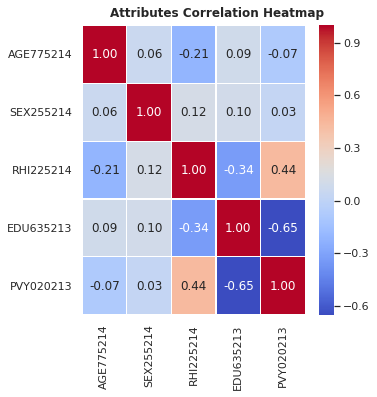

In [257]:
Dic_inv_sub={k:Dic_inv[k] for k in ("Persons 65 years and over, percent, 2014","Female persons, percent, 2014",
               "Black or African American alone, percent, 2014",
               "High school graduate or higher, percent of persons age 25+, 2009-2013",
               "Persons below poverty level, percent, 2009-2013") if k in Dic_inv}

trainf= train[["Persons 65 years and over, percent, 2014","Female persons, percent, 2014",
               "Black or African American alone, percent, 2014",
               "High school graduate or higher, percent of persons age 25+, 2009-2013",
               "Persons below poverty level, percent, 2009-2013"]]
trainf.rename(columns=Dic_inv_sub,inplace=True)
corr = trainf.corr()
fig, (ax) = plt.subplots(1, 1, figsize=(5,5))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Attributes Correlation Heatmap', 
              fontsize=12, 
              fontweight='bold')


## 1.2 Colinearity scatter plot

Text(0.5, 0.98, 'Pair plots of variables of interest')

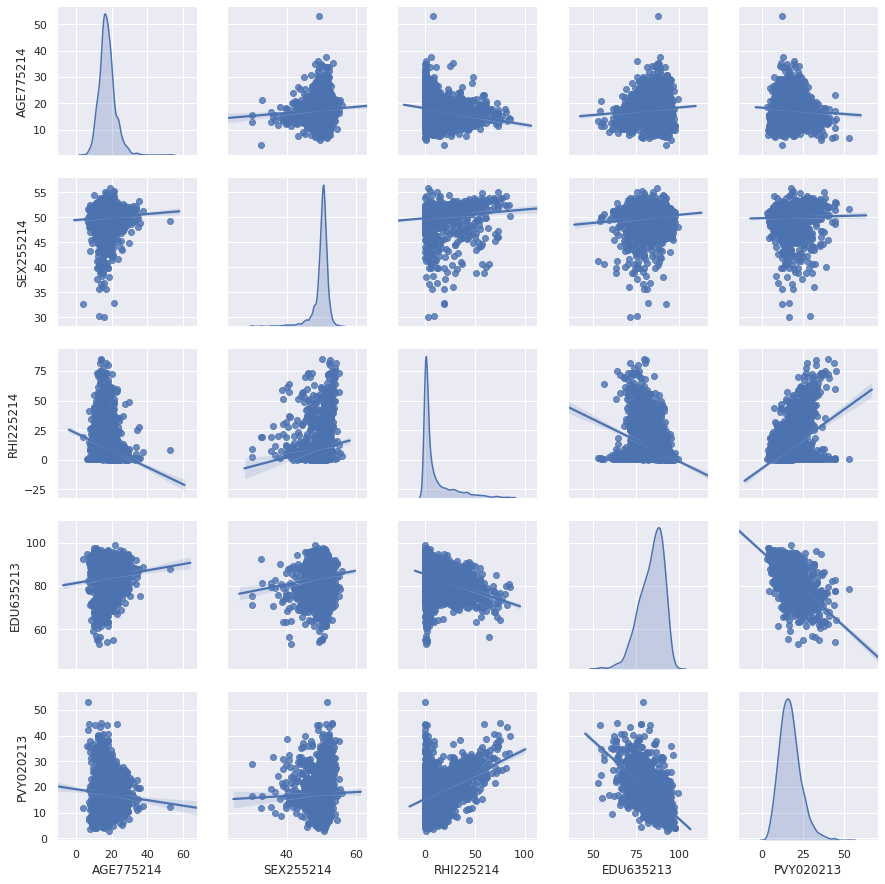

In [256]:
Features=["Persons 65 years and over, percent, 2014","Female persons, percent, 2014",
               "Black or African American alone, percent, 2014",
               "High school graduate or higher, percent of persons age 25+, 2009-2013",
               "Persons below poverty level, percent, 2009-2013"]
sns.set(font_scale=1)
b=sns.pairplot(train[Features].rename(columns=Dic_inv_sub),diag_kind='kde',kind='reg',)
fig.suptitle('Pair plots of variables of interest', 
              fontsize=12, 
              fontweight='bold')

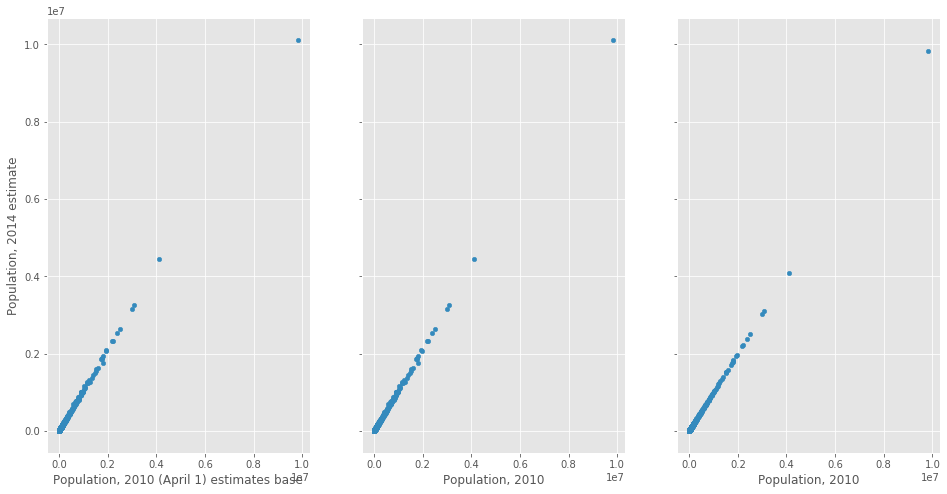

In [6]:
#clearly some colinear relationship between 2010 and April 2010
#2 != normal distributions

#visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)

train.plot(kind='scatter', y='Population, 2014 estimate', x='Population, 2010 (April 1) estimates base', ax=axs[0], figsize=(16, 8))
train.plot(kind='scatter', y='Population, 2014 estimate', x='Population, 2010', ax=axs[1])
train.plot(kind='scatter', y='Population, 2010 (April 1) estimates base', x='Population, 2010', ax=axs[2])

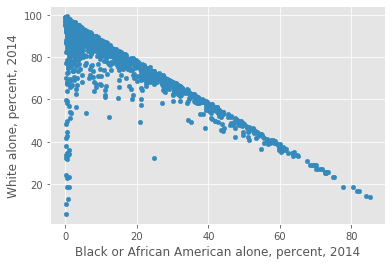

In [7]:
train.plot(kind='scatter', x='Black or African American alone, percent, 2014',y='White alone, percent, 2014')

## 2.1 Data analysis plotting Y,Xi

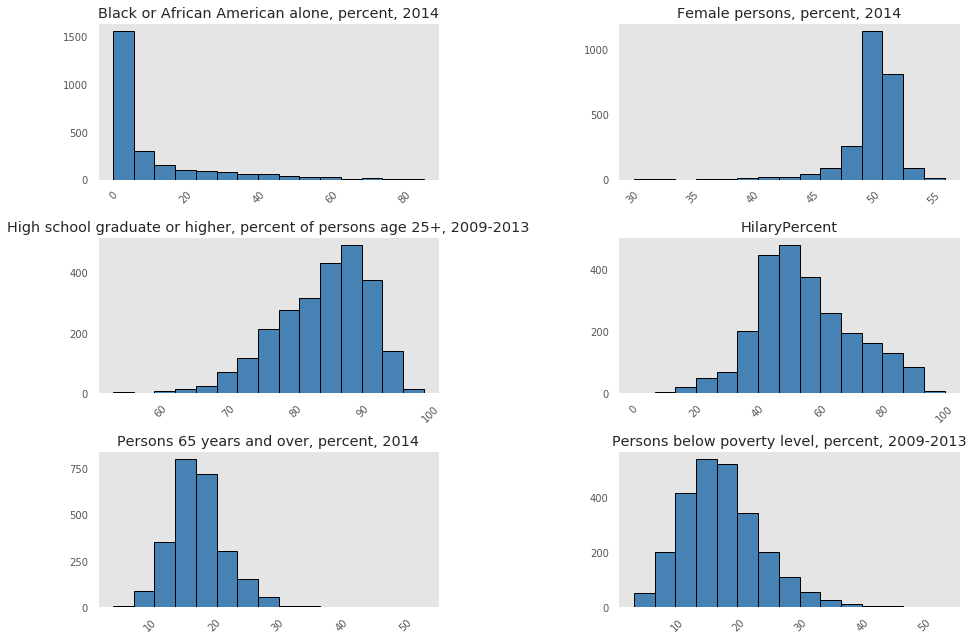

In [203]:
fig=train.hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,6),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 
fig=train.hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,6),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

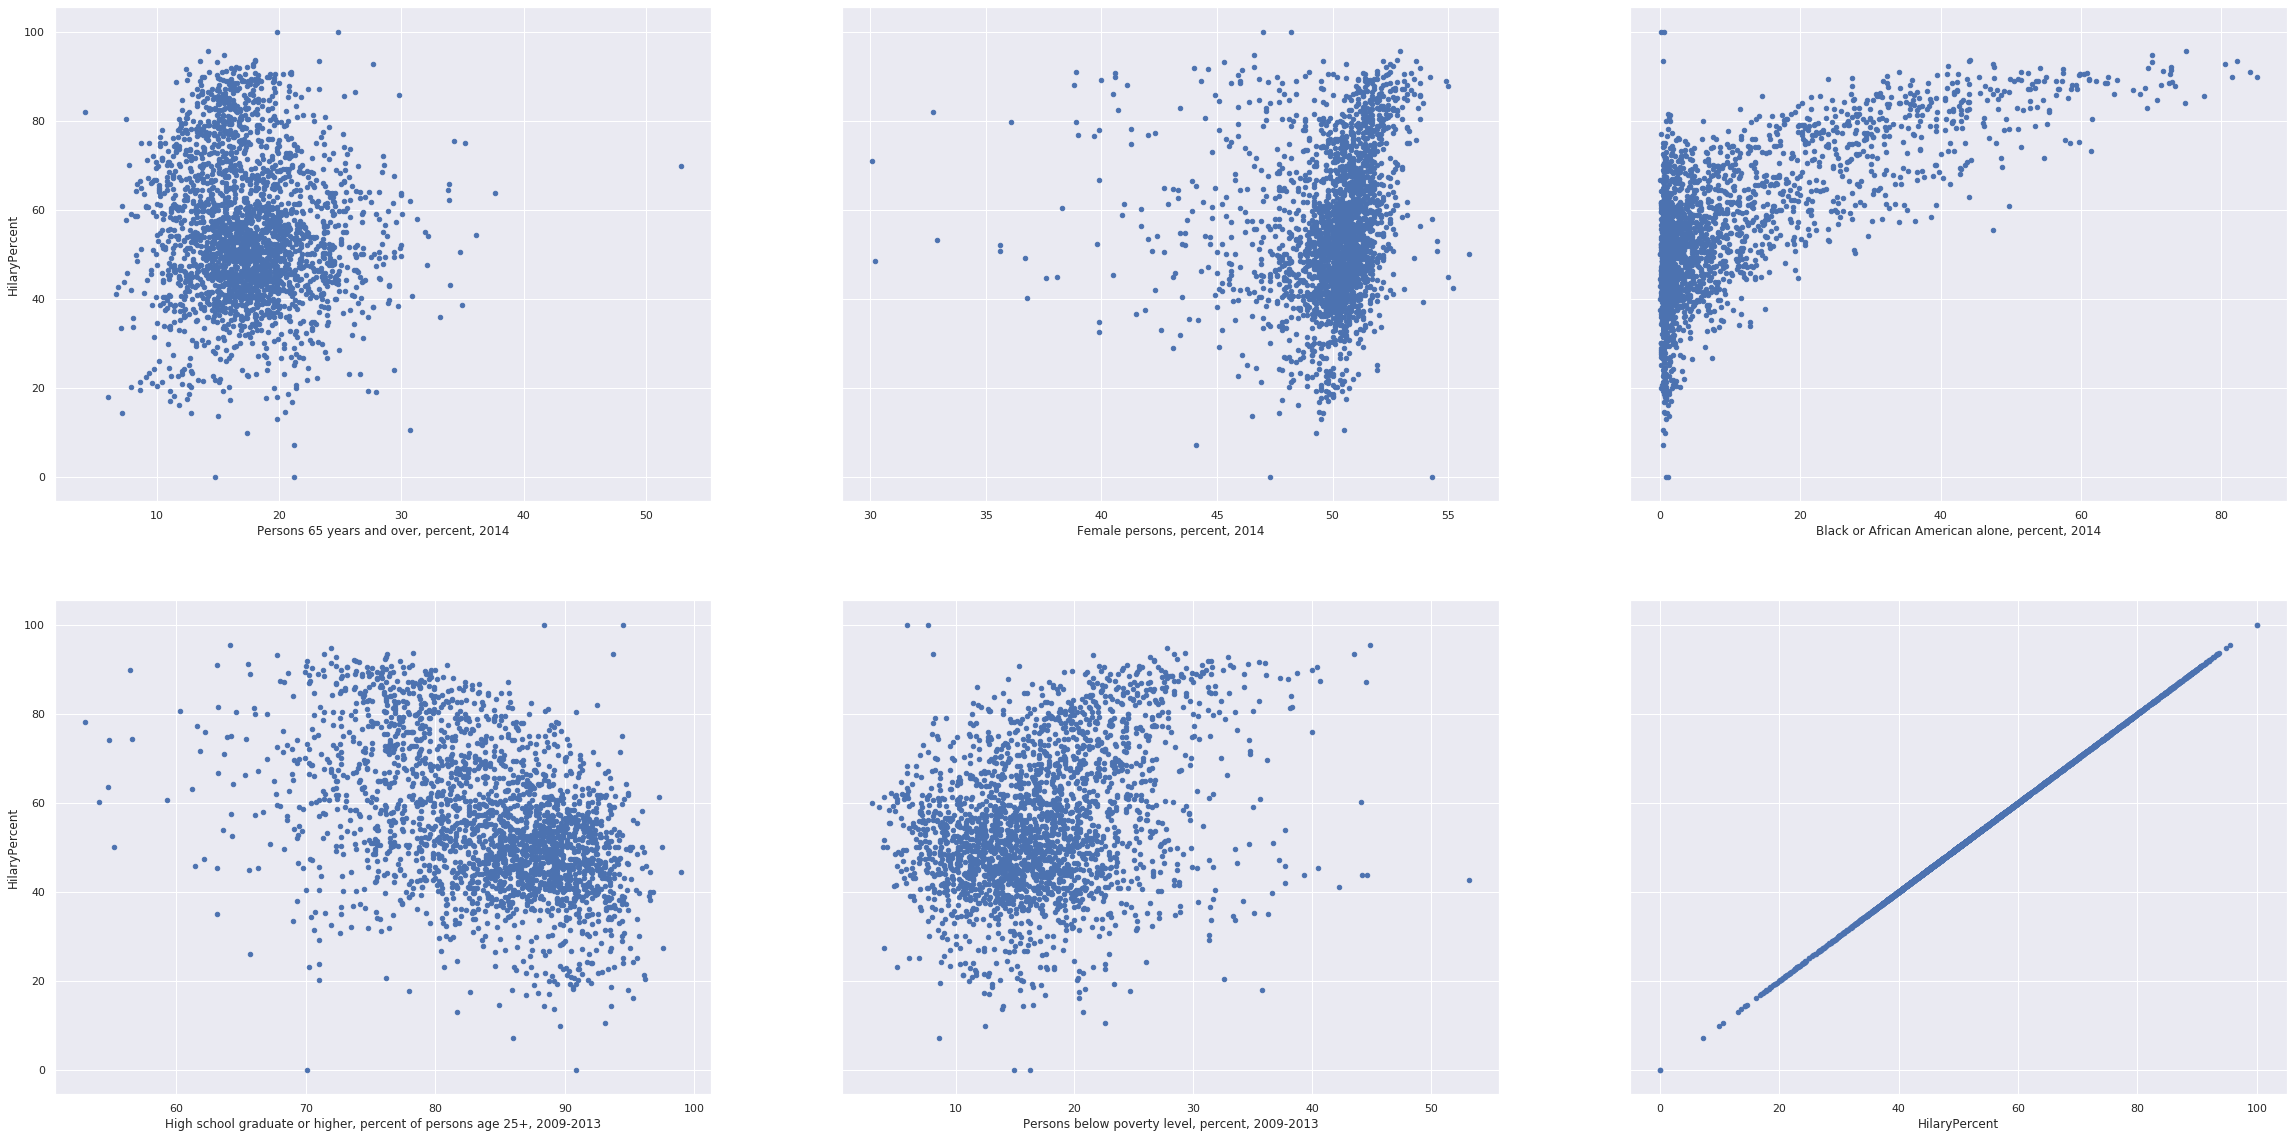

In [262]:
col_mod=['Persons 65 years and over, percent, 2014'
,'Female persons, percent, 2014'
,'Black or African American alone, percent, 2014'
, 'High school graduate or higher, percent of persons age 25+, 2009-2013'
, 'Persons below poverty level, percent, 2009-2013','HilaryPercent']

train=train[col_mod]
    
s=len(train.columns)-1 ## nombre de variable 
m=2 ## nbre de ligne
n=int(np.ceil(s/m)) ## nbre de colonne
      
#figsize=(16, 200)
fig, axs = plt.subplots(m, n, sharey=True,figsize=(40, 20))
iter=0

for i in range(0,m):
    for j in range (0,n):
        if iter <= s:           
            train.plot(kind='scatter', y='HilaryPercent', x=train.columns[iter], ax=axs[i][j])
        iter+=1
#plt.savefig('overview.png')

In [28]:
train_X=train.iloc[:,:-1]
train_y=train.HilaryPercent
train_X.index=[x for x in range(len(train_X))]
train_y.index=[x for x in range(len(train_X))]
train.index=[x for x in range(len(train))]
test.index=[x for x in range(len(test))]
scaler = prepro.StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)   

In [30]:
def train_and_plot_ols(train_scaled,Features):
    lm = smf.ols(formula='HilaryPercent ~ Q("'+Features+'")', data=train_scaled).fit()
#lm.params=lm.params.map('{:,.5f}'.format)
    # create a DataFrame with the minimum and maximum values of T
    X_new = pd.DataFrame({Features: [train_scaled[Features].min(),train_scaled[Features].max()]})
# make predictions for those x values and store them
    preds = lm.predict(X_new)
    train_scaled.plot(kind='scatter', x=Features, y='HilaryPercent')
# then, plot the least squares line
    plt.plot(X_new, preds, c='red', linewidth=2)
    plt.show()
    return lm  

def train_ols(train_scaled,Features):
    lm = smf.ols(formula='HilaryPercent ~ Q("'+Features+'")', data=train_scaled).fit()
    return lm  


def transf_train_and_plot_ols(train_scaled,Features):
    
    lm = smf.ols(formula='HilaryPercent ~ Q("'+Features+'")', data=train_scaled).fit()
#lm.params=lm.params.map('{:,.5f}'.format)
    # create a DataFrame with the minimum and maximum values of T
    X_new = pd.DataFrame({Features: [train_scaled[Features].min(),train_scaled[Features].max()]})
# make predictions for those x values and store them
    preds = lm.predict(X_new)
    train_scaled.plot(kind='scatter', x=Features, y='HilaryPercent')
# then, plot the least squares line
    plt.plot(X_new, preds, c='red', linewidth=2)
    plt.show()
    return lm 

## Univariate Linear Regression

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


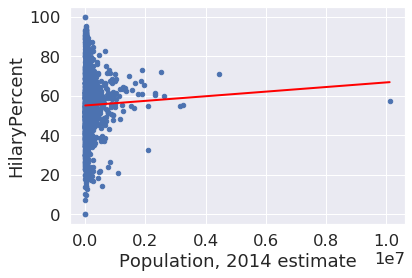

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.383
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.240
Time:                        19:18:06   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

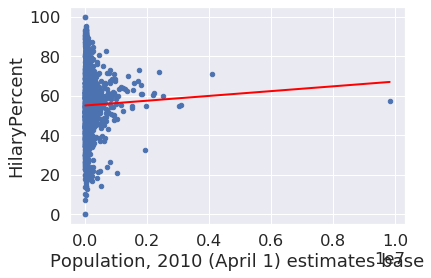

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.369
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.242
Time:                        19:18:06   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

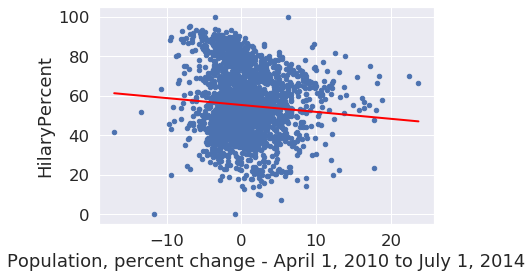

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     17.96
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           2.34e-05
Time:                        19:18:07   Log-Likelihood:                -10429.
No. Observations:                2492   AIC:                         2.086e+04
Df Residuals:                    2490   BIC:                         2.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

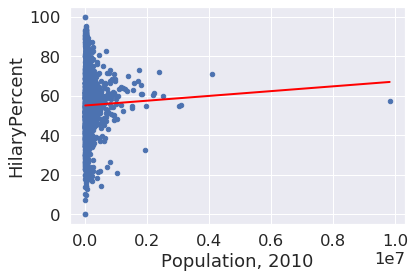

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.369
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.242
Time:                        19:18:07   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                55.11

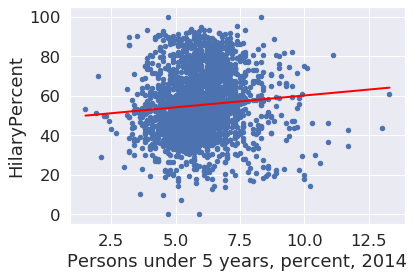

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     19.60
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           9.96e-06
Time:                        19:18:08   Log-Likelihood:                -10429.
No. Observations:                2492   AIC:                         2.086e+04
Df Residuals:                    2490   BIC:                         2.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

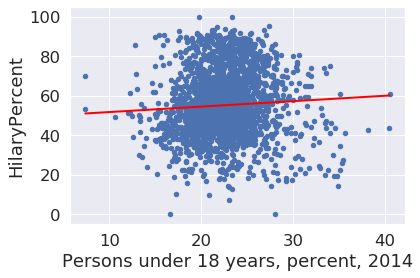

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.305
Date:                Tue, 17 Sep 2019   Prob (F-statistic):            0.00399
Time:                        19:18:08   Log-Likelihood:                -10434.
No. Observations:                2492   AIC:                         2.087e+04
Df Residuals:                    2490   BIC:                         2.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

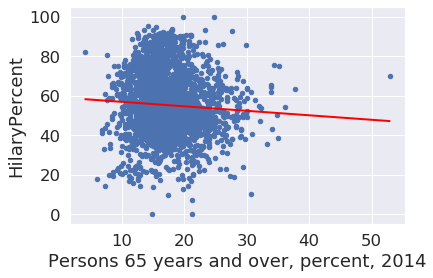

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     9.531
Date:                Tue, 17 Sep 2019   Prob (F-statistic):            0.00204
Time:                        19:18:08   Log-Likelihood:                -10434.
No. Observations:                2492   AIC:                         2.087e+04
Df Residuals:                    2490   BIC:                         2.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

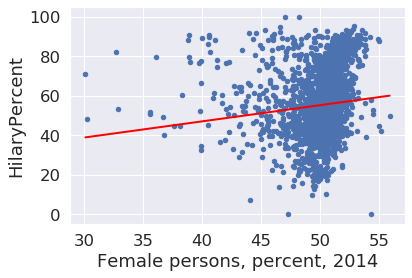

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     32.40
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           1.40e-08
Time:                        19:18:09   Log-Likelihood:                -10422.
No. Observations:                2492   AIC:                         2.085e+04
Df Residuals:                    2490   BIC:                         2.086e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

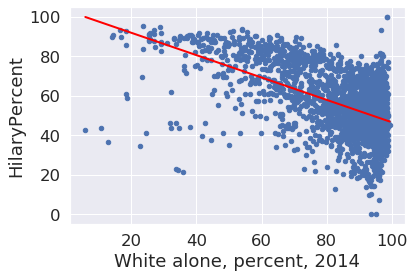

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     1201.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          4.22e-215
Time:                        19:18:09   Log-Likelihood:                -9947.9
No. Observations:                2492   AIC:                         1.990e+04
Df Residuals:                    2490   BIC:                         1.991e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

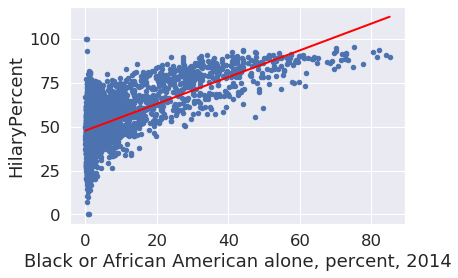

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     2512.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:18:09   Log-Likelihood:                -9569.2
No. Observations:                2492   AIC:                         1.914e+04
Df Residuals:                    2490   BIC:                         1.915e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

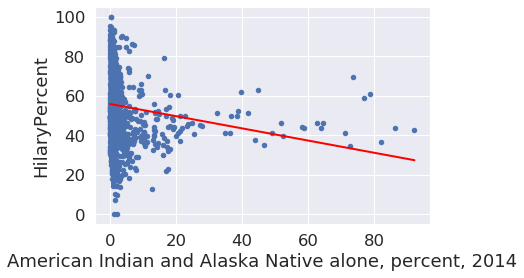

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     41.94
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           1.13e-10
Time:                        19:18:10   Log-Likelihood:                -10418.
No. Observations:                2492   AIC:                         2.084e+04
Df Residuals:                    2490   BIC:                         2.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

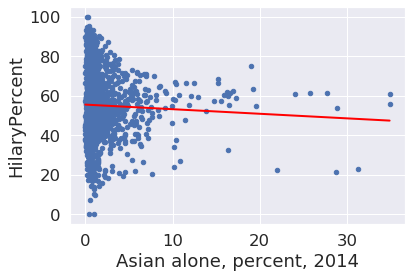

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.511
Date:                Tue, 17 Sep 2019   Prob (F-statistic):             0.0611
Time:                        19:18:10   Log-Likelihood:                -10437.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

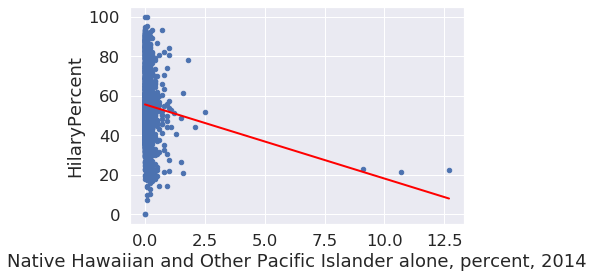

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     23.41
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           1.39e-06
Time:                        19:18:11   Log-Likelihood:                -10427.
No. Observations:                2492   AIC:                         2.086e+04
Df Residuals:                    2490   BIC:                         2.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

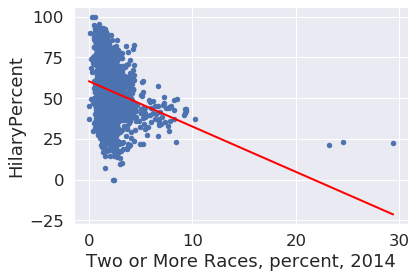

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     157.7
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           4.01e-35
Time:                        19:18:11   Log-Likelihood:                -10362.
No. Observations:                2492   AIC:                         2.073e+04
Df Residuals:                    2490   BIC:                         2.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

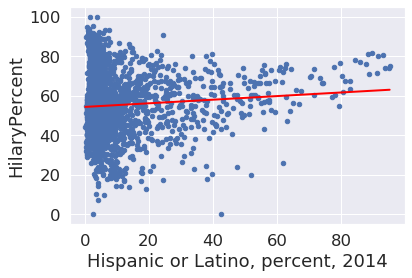

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     15.91
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           6.83e-05
Time:                        19:18:12   Log-Likelihood:                -10430.
No. Observations:                2492   AIC:                         2.086e+04
Df Residuals:                    2490   BIC:                         2.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

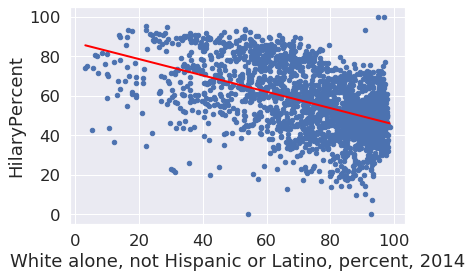

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     899.7
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          5.05e-169
Time:                        19:18:12   Log-Likelihood:                -10054.
No. Observations:                2492   AIC:                         2.011e+04
Df Residuals:                    2490   BIC:                         2.012e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

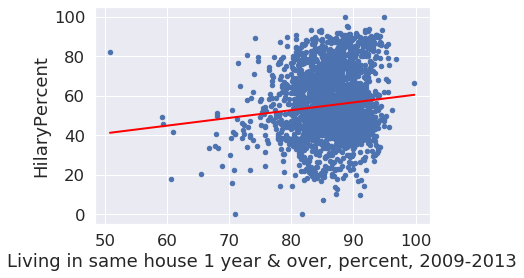

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     30.10
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           4.51e-08
Time:                        19:18:13   Log-Likelihood:                -10423.
No. Observations:                2492   AIC:                         2.085e+04
Df Residuals:                    2490   BIC:                         2.086e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

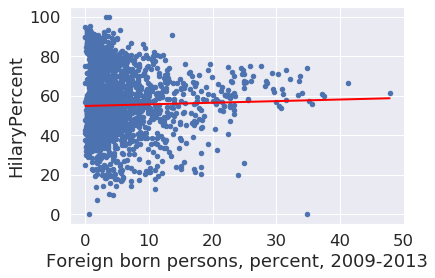

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.983
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.159
Time:                        19:18:13   Log-Likelihood:                -10437.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

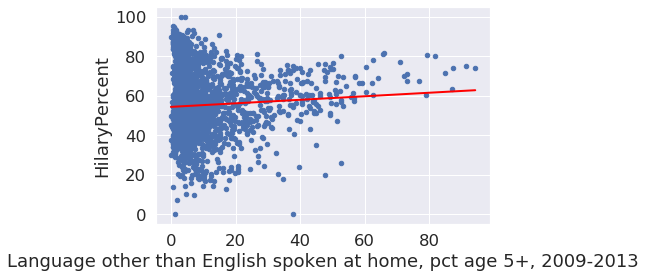

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     10.78
Date:                Tue, 17 Sep 2019   Prob (F-statistic):            0.00104
Time:                        19:18:14   Log-Likelihood:                -10433.
No. Observations:                2492   AIC:                         2.087e+04
Df Residuals:                    2490   BIC:                         2.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

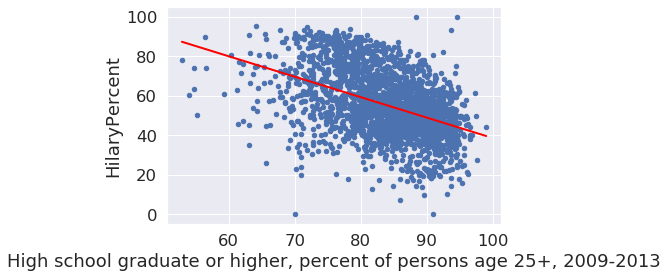

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     626.6
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          1.53e-123
Time:                        19:18:14   Log-Likelihood:                -10159.
No. Observations:                2492   AIC:                         2.032e+04
Df Residuals:                    2490   BIC:                         2.033e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

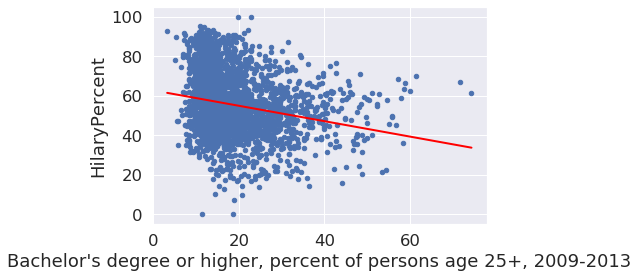

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           3.37e-27
Time:                        19:18:14   Log-Likelihood:                -10380.
No. Observations:                2492   AIC:                         2.076e+04
Df Residuals:                    2490   BIC:                         2.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

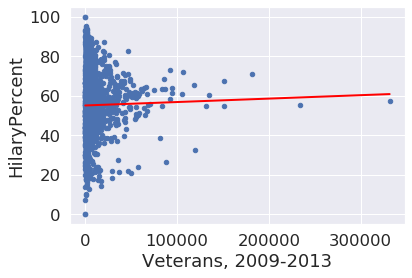

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7267
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.394
Time:                        19:18:15   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

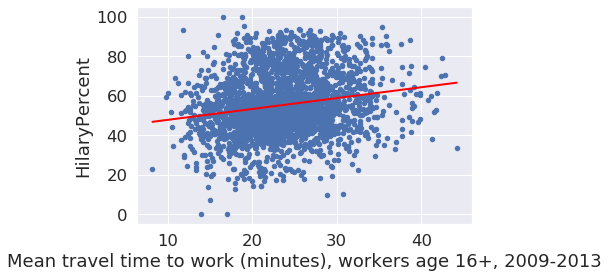

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     87.16
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           2.15e-20
Time:                        19:18:15   Log-Likelihood:                -10395.
No. Observations:                2492   AIC:                         2.079e+04
Df Residuals:                    2490   BIC:                         2.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

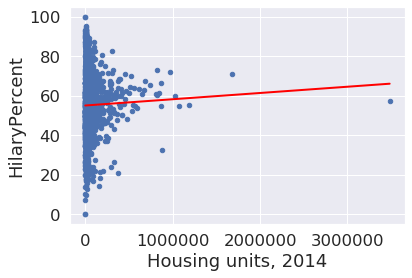

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.435
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.231
Time:                        19:18:15   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

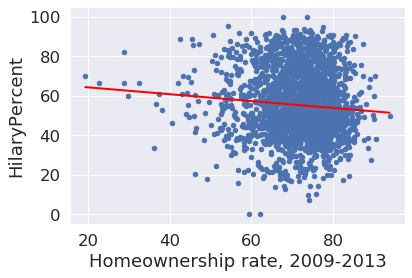

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     18.69
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           1.60e-05
Time:                        19:18:16   Log-Likelihood:                -10429.
No. Observations:                2492   AIC:                         2.086e+04
Df Residuals:                    2490   BIC:                         2.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

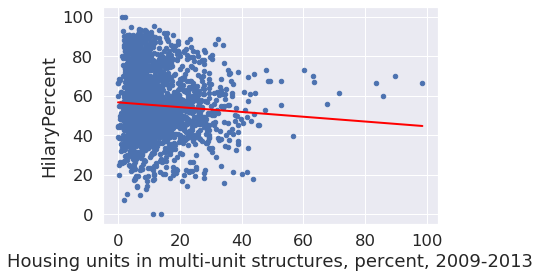

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     12.00
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000540
Time:                        19:18:16   Log-Likelihood:                -10432.
No. Observations:                2492   AIC:                         2.087e+04
Df Residuals:                    2490   BIC:                         2.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

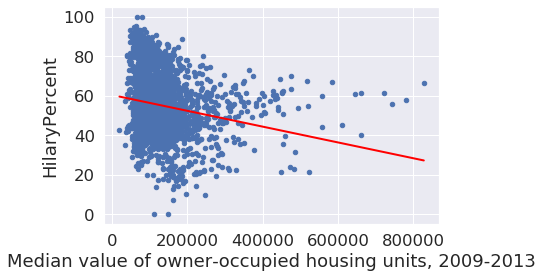

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     94.85
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           5.06e-22
Time:                        19:18:16   Log-Likelihood:                -10392.
No. Observations:                2492   AIC:                         2.079e+04
Df Residuals:                    2490   BIC:                         2.080e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

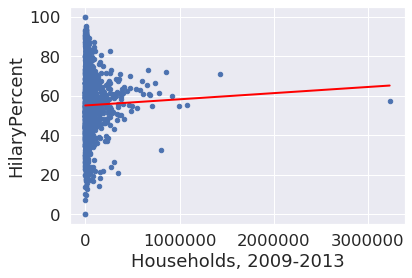

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.119
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.290
Time:                        19:18:17   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

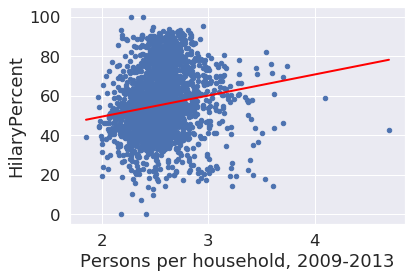

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     65.06
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           1.11e-15
Time:                        19:18:17   Log-Likelihood:                -10406.
No. Observations:                2492   AIC:                         2.082e+04
Df Residuals:                    2490   BIC:                         2.083e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

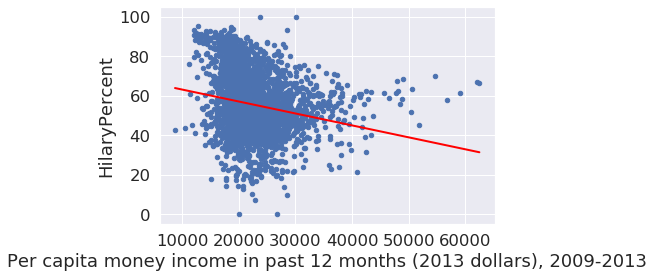

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     110.9
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           2.10e-25
Time:                        19:18:17   Log-Likelihood:                -10384.
No. Observations:                2492   AIC:                         2.077e+04
Df Residuals:                    2490   BIC:                         2.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

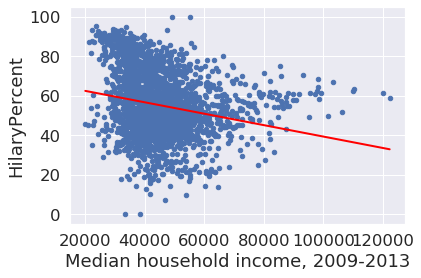

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     121.0
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           1.60e-27
Time:                        19:18:18   Log-Likelihood:                -10379.
No. Observations:                2492   AIC:                         2.076e+04
Df Residuals:                    2490   BIC:                         2.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

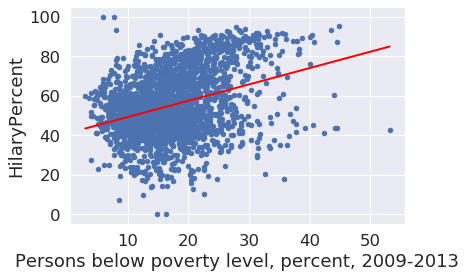

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     317.9
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           5.07e-67
Time:                        19:18:18   Log-Likelihood:                -10289.
No. Observations:                2492   AIC:                         2.058e+04
Df Residuals:                    2490   BIC:                         2.059e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

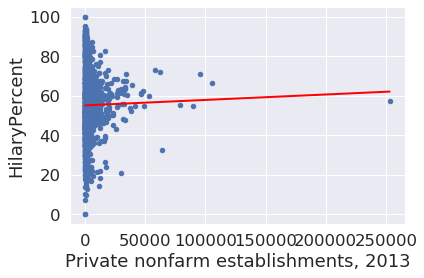

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4915
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.483
Time:                        19:18:18   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

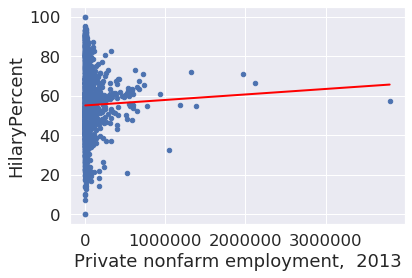

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.354
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.245
Time:                        19:18:19   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

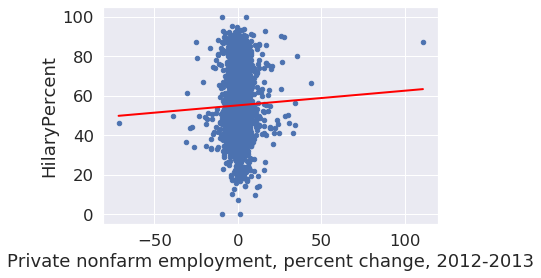

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.960
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.162
Time:                        19:18:19   Log-Likelihood:                -10437.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

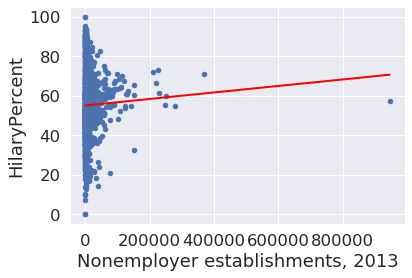

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.049
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.152
Time:                        19:18:19   Log-Likelihood:                -10437.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

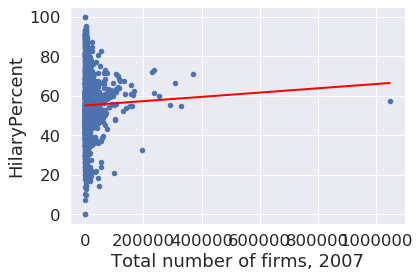

                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.120
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.290
Time:                        19:18:20   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


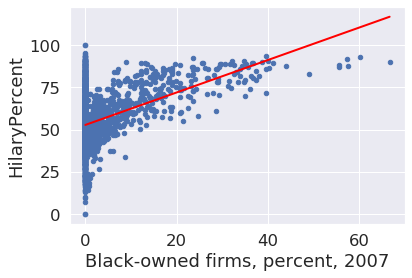

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     518.6
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          1.98e-104
Time:                        19:18:21   Log-Likelihood:                -10203.
No. Observations:                2492   AIC:                         2.041e+04
Df Residuals:                    2490   BIC:                         2.042e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

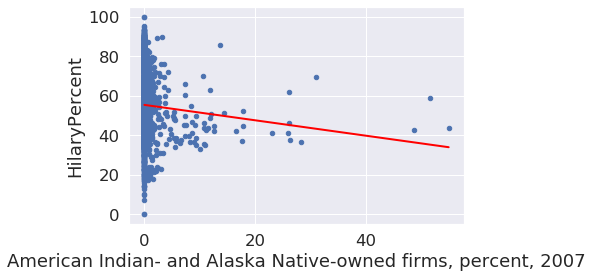

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     10.77
Date:                Tue, 17 Sep 2019   Prob (F-statistic):            0.00105
Time:                        19:18:21   Log-Likelihood:                -10433.
No. Observations:                2492   AIC:                         2.087e+04
Df Residuals:                    2490   BIC:                         2.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

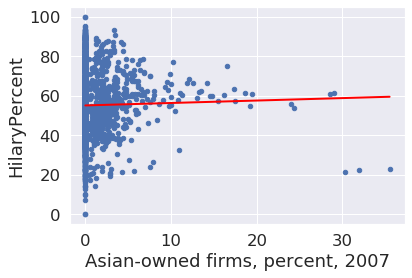

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9160
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.339
Time:                        19:18:21   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

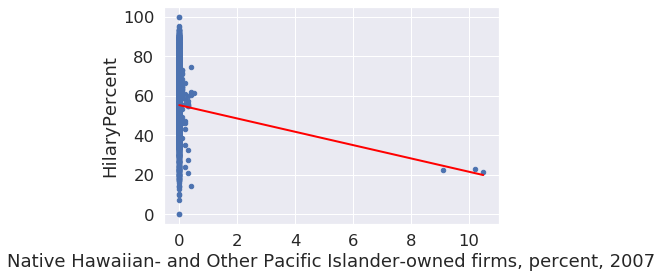

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     13.39
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000259
Time:                        19:18:21   Log-Likelihood:                -10432.
No. Observations:                2492   AIC:                         2.087e+04
Df Residuals:                    2490   BIC:                         2.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

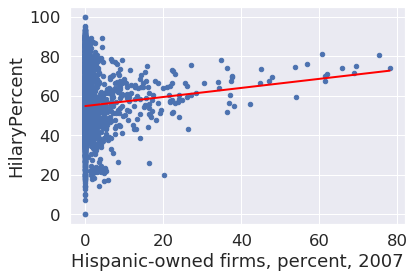

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     21.36
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           4.00e-06
Time:                        19:18:22   Log-Likelihood:                -10428.
No. Observations:                2492   AIC:                         2.086e+04
Df Residuals:                    2490   BIC:                         2.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

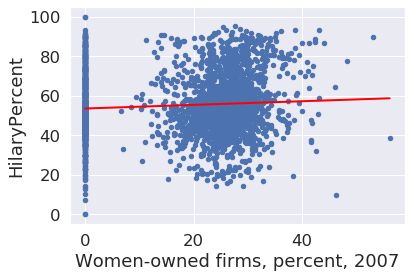

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     13.72
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000217
Time:                        19:18:22   Log-Likelihood:                -10431.
No. Observations:                2492   AIC:                         2.087e+04
Df Residuals:                    2490   BIC:                         2.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

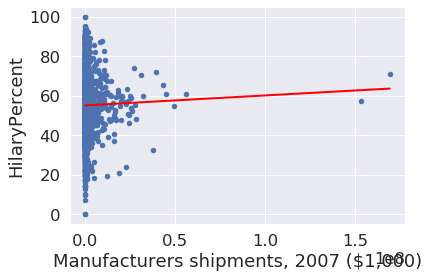

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8745
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.350
Time:                        19:18:23   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

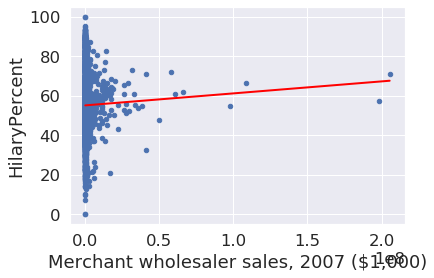

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.052
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.152
Time:                        19:18:23   Log-Likelihood:                -10437.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

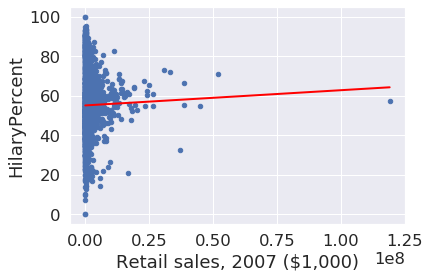

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9637
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.326
Time:                        19:18:24   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

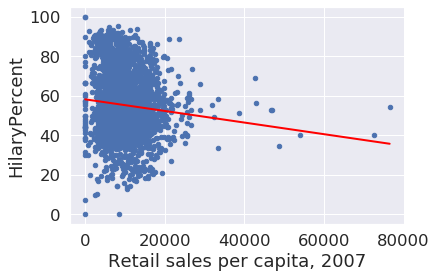

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     24.61
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           7.50e-07
Time:                        19:18:24   Log-Likelihood:                -10426.
No. Observations:                2492   AIC:                         2.086e+04
Df Residuals:                    2490   BIC:                         2.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

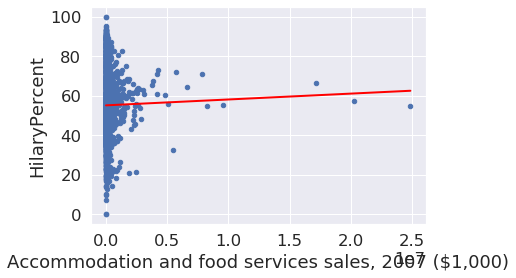

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6961
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.404
Time:                        19:18:24   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

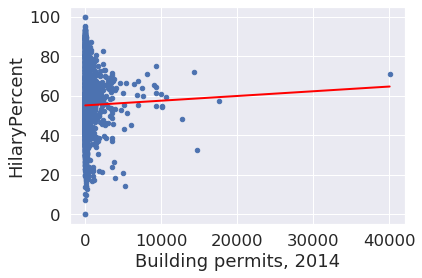

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.021
Date:                Tue, 17 Sep 2019   Prob (F-statistic):              0.312
Time:                        19:18:25   Log-Likelihood:                -10438.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

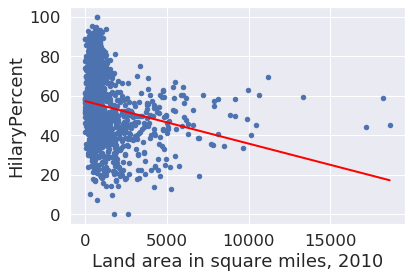

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     82.01
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           2.67e-19
Time:                        19:18:25   Log-Likelihood:                -10398.
No. Observations:                2492   AIC:                         2.080e+04
Df Residuals:                    2490   BIC:                         2.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


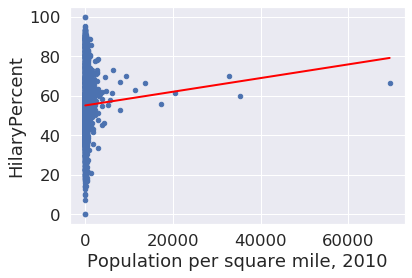

                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.179
Date:                Tue, 17 Sep 2019   Prob (F-statistic):             0.0410
Time:                        19:18:26   Log-Likelihood:                -10436.
No. Observations:                2492   AIC:                         2.088e+04
Df Residuals:                    2490   BIC:                         2.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [31]:
##### Statsmodels.api Univariate Linear Regression
for i in range(len(train_scaled.columns)-1):
    modal=train_and_plot_ols(train_scaled,train_scaled.columns[i])
    print(modal.summary()) 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2761.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:18:34   Log-Likelihood:                -9508.7
No. Observations:                2492   AIC:                         1.902e+04
Df Residuals:                    2490   BIC:                         1.903e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

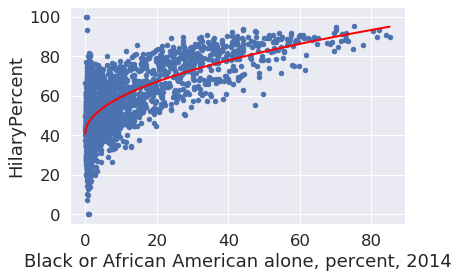

In [33]:
train_scaled=train
Features=train_scaled.columns[9]
lm = smf.ols(formula='HilaryPercent ~ np.sqrt(Q("'+Features+'"))', data=train_scaled).fit()
#lm.params=lm.params.map('{:,.5f}'.format)
# create a DataFrame with the minimum and maximum values of T
print(lm.summary()) 
#X_new = pd.DataFrame({Features: [train_scaled[Features].min(),train_scaled[Features].max()]})
X_new=train_scaled[Features]

# make predictions for those x values and store them
preds = lm.predict(X_new)
train_scaled.plot(kind='scatter', x=Features, y='HilaryPercent')
# then, plot the least squares line
XYplot= pd.DataFrame()
XYplot['X_new']=X_new
XYplot['preds']=preds
XYplot.sort_values('X_new',inplace=True)

plt.plot(XYplot['X_new'], XYplot['preds'], c='red', linewidth=2)
plt.show()

## Multiple linear regression

In [259]:
##### Statsmodels.api Univariate Linear Regression
modals=[]
for i in range(len(train_scaled.columns)-1):
    modal=train_ols(train_scaled,train_scaled.columns[i])
    modals+=[[modal,modal.rsquared_adj,train_scaled.columns[i],modal.pvalues[0],modal.pvalues[1],modal.tvalues[0],modal.tvalues[1]]]  

## Univariate modal sorted descending by R2
df=pd.DataFrame(data=modals,columns=['modal','rsquared_adj','var','pval_interc','pval_var','tval_interc','tval_var'])
df['rsquared_adj']=df['rsquared_adj'].map('{:,.7f}'.format)
df['pval_var']=df['pval_var'].map('{:,.7f}'.format)
df['pval_interc']=df['pval_interc'].map('{:,.7f}'.format)
df['tval_var']=df['tval_var'].map('{:,.7f}'.format)
df['tval_interc']=df['tval_interc'].map('{:,.7f}'.format)

cols=df[['var','rsquared_adj','pval_interc','pval_var','tval_interc','tval_var']].sort_values(by='rsquared_adj',ascending=False)
cols.head(3)
#cols.iloc[2,0]

,var,rsquared_adj,pval_interc,pval_var,tval_interc,tval_var
9,"Black or African American alone, percent, 2014",0.5019656,0.0000000,0.0000000,175.9957422,50.1164914
8,"White alone, percent, 2014",0.3251100,0.0000000,0.0000000,73.2337495,-34.6550378
15,"White alone, not Hispanic or Latino, percent, ...",0.2651338,0.0000000,0.0000000,79.7655566,-29.9955416


In [261]:
Features=[
'Q("Persons 65 years and over, percent, 2014")'
#,'Q("Population, percent change - April 1, 2010 to July 1, 2014")' +0.02
#,'Q("White alone, not Hispanic or Latino, percent, 2014")' +0.04
#,'np.sqrt(Q("Black-owned firms, percent, 2007"))' BAD
#,'Q("Homeownership rate, 2009-2013")' GOOD WITH WHITE ALONE
#,'Q("White alone, not Hispanic or Latino, percent, 2014")' GOOD
#,'Q("Land area in square miles, 2010")' BAD
,'Q("Female persons, percent, 2014")' 
,'np.sqrt(Q("Black or African American alone, percent, 2014"))' 
,'Q("High school graduate or higher, percent of persons age 25+, 2009-2013")'
,'Q("Persons below poverty level, percent, 2009-2013")']

seperator = '+'
Features=seperator.join(Features)

#Include  Q("") 
#for i in range(len(Features)):
#    Features[i]= 'Q("'+Features[i]+'")'

lm = smf.ols(formula='HilaryPercent ~ '+Features, data=train_scaled).fit()
lm.summary()

###Ploting the modal
#lm.params=lm.params.map('{:,.5f}'.format)
# create a DataFrame with the minimum and maximum values of T
#X_new = pd.DataFrame({Features: [train_scaled[Features].min(),train_scaled[Features].max()]})
# make predictions for those x values and store them
#preds = lm.predict(X_new)
#train_scaled.plot(kind='scatter', x=Features, y='HilaryPercent')
# then, plot the least squares line


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          HilaryPercent   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     768.4
Date:                Thu, 19 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:56:37   Log-Likelihood:                -9274.2
No. Observations:                2492   AIC:                         1.856e+04
Df Residuals:                    2486   BIC:                         1.860e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     76.7370      5.467     14.037      0.000      66.017      87.457
Q("Persons 65 years and over, percent, 2014")                                  0.5354      0.048     11.108      0.000       0.441       0.630
Q("Female persons, percent, 2014")                                             0.4870      0.093      5.233      0.000       0.305       0.670
np.sqrt(Q("Black or African American alone, percent, 2014"))                   5.6998      0.117     48.904      0.000       5.471       5.928
Q("High school graduate or higher, percent of persons age 25+, 2009-2013")    -0.7509      0.039    -19.191      0.000      -0.828      -0.674
Q("Persons below poverty level, percent, 2009-2013")                          -0.3555      0.042     -8.422      0.000      -0.438      -0.273
==============================================================================
Omnibus:                      111.826   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.382
Skew:                          -0.174   Prob(JB):                     1.21e-69
Kurtosis:                       4.713   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# get the residuals of the fitted model
res = lm.resid

import statsmodels.api as sm
import scipy.stats as stats

f1 = plt.figure(figsize=(6,6))
f1 = plt.hist(fit.resid_pearson)
f1 = plt.ylabel('Count')
f1 = plt.xlabel('Normalized residuals') 

fig = plt.figure(figsize=(6,6))
fig = sm.qqplot(res, stats.distributions.norm, line='r') 
# plt.show()

In [ ]:
# regression exog plot related to the variable
variable = 'Q("Black or African American alone, percent, 2014")'

fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(fit, variable, fig=fig)

fig1 = plt.figure(figsize=(10,8))
fig1 = sm.graphics.plot_regress_exog(fit, variable, fig=fig1)

In [ ]:
# plot the residuals vs fitted values
fig = plt.figure(figsize=(6,6))
plt.scatter(lm.fittedvalues, lm.resid)
plt.axhline(y=0, linewidth=2, color = 'r')

fig = plt.figure(figsize=(6,6))
plt.scatter(lm.fittedvalues, lm.resid_pearson)
plt.axhline(y=0, linewidth=2, color = 'r')
plt.axhline(y=3, linestyle='dashed', linewidth=2, color = 'r')
plt.axhline(y=-3, linestyle='dashed', linewidth=2, color = 'r')

In [ ]:
# plot the residuals vs fitted values
fig = plt.figure(figsize=(6,6))
plt.scatter(lm.fittedvalues, lm.resid)
plt.axhline(y=0, linewidth=2, color = 'r')

fig = plt.figure(figsize=(6,6))
plt.scatter(lm.fittedvalues, lm.resid_pearson)
plt.axhline(y=0, linewidth=2, color = 'r')
plt.axhline(y=3, linestyle='dashed', linewidth=2, color = 'r')
plt.axhline(y=-3, linestyle='dashed', linewidth=2, color = 'r')



In [ ]:
 ##boxplots

f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(data=wines,  
            x="quality", 
            y="alcohol", 
            ax=ax)

ax.set_xlabel("Wine Quality",size=12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size=12,alpha=0.8)